In [1]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [2]:
pl.style.use('fabiostyle')
# needs to find the library of functions
sys.path.append('../../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [3]:
# %%javascript
# var nb = IPython.notebook;
# var kernel = IPython.notebook.kernel;
# var command = "NOTEBOOK_NAME = '" + nb.base_url + nb.notebook_path + "'";
# kernel.execute(command);

In [194]:
# NOTEBOOK_NAME = NOTEBOOK_NAME.split('/')[-1][:-6]
NOTEBOOK_NAME = 'decoding_vs_baseline_across_vhpc'

In [5]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [6]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

In [7]:
all_animals =     'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'
pre_animals =     'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'
post_animals =    'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93','91b','92b','93b'
pre_rev_animals = 'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'
post_rev_animals ='c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93','91b','92b','93b'
catch_animals =   'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'

In [8]:
#find animals common to both sessions
preVSpost_animals =       'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'
preVSpre_rev_animals =    'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'
preVSpost_rev_animals =   'c3f3',         'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91',       '93'
postVSpost_rev_animals =  'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93','91b','92b','93b'
postVSpre_rev_animals =   'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'
pre_revVSpost_rev_animals='c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'
postVScatch_animals =     'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'
post_revVScatch_animals=  'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92',

In [9]:
sessions = 'pre','post','pre_rev','post_rev','catch'

In [10]:
for sess in sessions:
    for dur in 1,: #use 5 for 0.5sec, 1 for 1 sec and 2 for 2sec
        exec("patterns_tb_%s_%s = dict(zip(%s_animals, [ut.load_variable('patterns_tb_%s_%s',\
                                                           '../%%s/notebooks/autorestore/patterns_time_bins/'%%ani)\
                                                  for ani in %s_animals]))"%(sess,dur,sess,sess,dur,sess))
        exec("labels_%s = dict(zip(%s_animals, [ut.load_variable('labels_%s',\
                                                         '../%%s/notebooks/autorestore/patterns_time_bins/'%%ani)\
                                                  for ani in %s_animals]))"%(sess,sess,sess,sess))

In [11]:
comparisons = 'preVSpost','preVSpre_rev','preVSpost_rev','postVSpre_rev','postVSpost_rev','pre_revVSpost_rev','postVScatch','post_revVScatch'

In [12]:
#get cross-session patterns
for comp in comparisons:
    for dur in 1,:
        exec("%s__patterns__%s = dict(zip(%s_animals, [ut.load_variable('%s_patterns_%s_%s',\
                                                           '../%%s/notebooks/autorestore/patterns_time_bins/'%%ani)\
                                                  for ani in %s_animals]))"%(comp,comp.split('VS')[0],comp,
                                                    comp,comp.split('VS')[0],dur,comp))
        exec("%s__patterns__%s = dict(zip(%s_animals, [ut.load_variable('%s_patterns_%s_%s',\
                                                           '../%%s/notebooks/autorestore/patterns_time_bins/'%%ani)\
                                                  for ani in %s_animals]))"%(comp,comp.split('VS')[1],comp,
                                                    comp,comp.split('VS')[1],dur,comp))
        exec("labels_%s_%s = dict(zip(%s_animals, [ut.load_variable('labels_%s',\
                                                         '../%%s/notebooks/autorestore/patterns_time_bins/'%%ani)\
                                                  for ani in %s_animals]))"%(comp,comp.split('VS')[0],comp,comp.split('VS')[0],
                                                                            comp))
        exec("labels_%s_%s = dict(zip(%s_animals, [ut.load_variable('labels_%s',\
                                                         '../%%s/notebooks/autorestore/patterns_time_bins/'%%ani)\
                                                  for ani in %s_animals]))"%(comp,comp.split('VS')[1],comp,comp.split('VS')[1],
                                                                            comp))

## DONT THINK I NEED THIS FOR THIS NB
relabel_rwVSsh = {0:-3,1:1,2:0,-1:-1,-2:-2}
relabel_rwVScsm = {0:0,1:1,2:-3,-1:-1,-2:-2}
relabel_shVScsm = {0:0,1:-3,2:1,-1:-1,-2:-2}

for sess in sessions:
    exec("labels_rwVSsh_%s = {}"%sess)
    exec("labels_rwVScsm_%s = {}"%sess)
    exec("labels_shVScsm_%s = {}"%sess)
    for ani in eval("%s_animals"%sess):
        exec("labels_rwVSsh_%s[ani] = np.r_[[relabel_rwVSsh[l] for l in labels_%s[ani]]]"%(sess,sess))
        exec("labels_rwVScsm_%s[ani] = np.r_[[relabel_rwVScsm[l] for l in labels_%s[ani]]]"%(sess,sess))
        exec("labels_shVScsm_%s[ani] = np.r_[[relabel_shVScsm[l] for l in labels_%s[ani]]]"%(sess,sess))
        
for comp in comparisons:
    for i in range(2):
        exec("labels_rwVSsh_%s_%s = {}"%(comp,comp.split('VS')[i]))
        exec("labels_rwVScsm_%s_%s = {}"%(comp,comp.split('VS')[i]))
        exec("labels_shVScsm_%s_%s = {}"%(comp,comp.split('VS')[i]))
        for ani in eval("%s_animals"%comp):
            exec("labels_rwVSsh_%s_%s[ani] = np.r_[[relabel_rwVSsh[l] for l in labels_%s_%s[ani]]]"%(comp,comp.split('VS')[i],comp,comp.split('VS')[i]))
            exec("labels_rwVScsm_%s_%s[ani] = np.r_[[relabel_rwVScsm[l] for l in labels_%s_%s[ani]]]"%(comp,comp.split('VS')[i],comp,comp.split('VS')[i]))
            exec("labels_shVScsm_%s_%s[ani] = np.r_[[relabel_shVScsm[l] for l in labels_%s_%s[ani]]]"%(comp,comp.split('VS')[i],comp,comp.split('VS')[i]))

In [13]:
relabel_nd = {0:0,1:1,2:2,-1:6,-2:7}

for sess in 'catch',:
    exec("labels_%s_nd = {}"%(sess))
    for ani in eval("%s_animals"%sess):
        exec("labels_%s_nd[ani] = np.r_[[relabel_nd[l] for l in labels_%s[ani]]]"%(sess,sess))
exec("labels_%s = labels_%s_nd.copy()"%(sess,sess))

In [14]:
all_comparisons = 'preVSpost__patterns__pre',\
'preVSpost__patterns__post',\
'preVSpre_rev__patterns__pre',\
'preVSpre_rev__patterns__pre_rev',\
'preVSpost_rev__patterns__pre',\
'preVSpost_rev__patterns__post_rev',\
'postVSpre_rev__patterns__post',\
'postVSpre_rev__patterns__pre_rev',\
'postVSpost_rev__patterns__post',\
'postVSpost_rev__patterns__post_rev',\
'pre_revVSpost_rev__patterns__pre_rev',\
'pre_revVSpost_rev__patterns__post_rev',\
'postVScatch__patterns__post',\
'postVScatch__patterns__catch',\
'post_revVScatch__patterns__post_rev',\
'post_revVScatch__patterns__catch',\

In [15]:
all_comparisons_partners = 'post','pre','pre_rev','pre','post_rev','pre','pre_rev','post','post_rev','post','pre_rev','post_rev','catch','post','catch','post_rev'

In [16]:
for comp in all_comparisons:
    for t in range(len(patterns_tb_pre_1['90'])):
        exec("%s_tb_%s = {}"%(comp,t))
        for ani in eval('%s_animals'%comp.split('__')[0]):
            try:
                #print comp.split('-')[0],
                #print ani,
                #print t,
                exec("%s_tb_%s['%s'] = %s['%s'][%s]"%(comp,t,ani,comp,ani,t))
            except IOError as error:
                print 'ERROR'
            continue

#ani_comparisons = 'expopre','expopost','prepost','preext1','preext2','prerenew','postext1','postext2','postrenew','ext1ext2','ext1renew','ext2renew'
for comp in all_comparisons:
    for t in range(len(patterns_tb_pre['90'])):
        exec("%s_tb_%s = {}"%(comp,t))
        for ani in eval('%s_animals'%comp.split('__')[0]):
            try:
                print comp.split('__')[0],
                print ani,
                print t,
                exec("%s_tb_%s['%s'] = %s['%s'][%s]"%(comp,t,ani,comp,ani,t))
            except IOError as error:
                print 'ERROR'
            continue

In [17]:
#delta_t0 = 1sec
#from referenced notebook, 14 time bins total beginning at 3s prior to odor onset and running through 11s post onset

#t_start0 = -3  # sec
#t_stop0 = 11  # sec

In [18]:
#set downsampling parameter to:
#max_cells = all cells
#intraregion_min = downsample to the comparison with fewest cells within the same hippo region
#interregion_min = downsample to the comparison with fewest cells, considering both hippo regions
#gmin = the global minimum (pretty much corresponds to interregion_min)

downsample = 281 # minimum number of cells or post vs post_rev (which is really all we're interested in here)

In [19]:
if downsample == 'max_cells':
    n_cells = None #will use all registered cells
if downsample == 'intraregion_min':
    n_cells = ut.load_variable('n_cells_across_min_vhpc', '../notebooks/autorestore/n_cells/')
if downsample == 'interregion_min':
    n_cells = ut.load_variable('n_cells_across_min_overall', '../notebooks/autorestore/n_cells/')
if downsample == 'gmin':
    n_cells = ut.load_variable('n_cells_gmin', '../notebooks/autorestore/n_cells/')
if type(downsample) != str:
    n_cells = downsample
    
print "# of cells =",n_cells

# of cells = 281


In [20]:
#mmc = multiple-comparisons correction (using bonferroni), where mcc = number of comparisons))

from matplotlib.lines import Line2D
def add_significance(ax, array1, array2, x1, x2, y, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
    p = sig_func(array1, array2)[-1]
    sig_value = sig_func(array1, array2)[0]
    deltay = np.diff(ax.axis()[-2:])*ticksize
    line = Line2D([x1, x1, x2, x2], [y-deltay, y, y, y-deltay], lw=.5, color='k', clip_on=False)
    ax.add_line(line)
    ax.text(np.mean([x1, x2]), y+1,
            'n.s.' if p > thresholds[0]/mcc else
            '*' if p > thresholds[1]/mcc else
            '**' if p > thresholds[2]/mcc else
            '***',
            ha='center', fontsize=4)
    return sig_value, p

In [21]:
def sig_vs_chance(ax, array1, chance, x1, y1, loops=15, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001),colors='k'):
    if sig_func is None:
        sig_func = lambda x: sstats.wilcoxon(x)
        subtracted = [x-chance for x in array1]
        p = sig_func(subtracted)[-1]
        sig_value = sig_func(subtracted)[0]
    elif sig_func is ttest:
        sig_func = lambda x, y: sstats.ttest_1samp(x,y)
        p = sig_func(array1,chance)[-1]
        sig_value = sig_func(array1,chance)[0]
    ax.text(x1, y1,
            'n.s.' if p>thresholds[0] else
            '*' if p>thresholds[1] else
            '**' if p>thresholds[2] else
            '***',
            ha='center', fontsize=4, color=colors)
    return sig_value, p

### need to take data from a single trial type and duplicate it, assigning it a new label/class. Then use the baseline time bin of the dataset with this new label and decode against all time bins from original dataset

#make a new label array, assigning new labels for each trial type
relabel_baselines = {0:3,1:4,2:5,-1:-4,-2:-5}

for comp in sessions:
    exec("labels_baselines_%s = {}"%sess)
    for ani in eval("%s_animals"%sess):
        exec("labels_baselines_%s[ani] = np.r_[[relabel_baselines[l] for l in labels_%s[ani]]]"%(sess,sess))

#make a new label array, assigning new labels for each trial type
relabel_baselines = {0:3,1:4,2:5,6:8,7:9}

for sess in 'catch',:
    exec("labels_baselines_%s = {}"%sess)
    for ani in eval("%s_animals"%sess):
        exec("labels_baselines_%s[ani] = np.r_[[relabel_baselines[l] for l in labels_%s[ani]]]"%(sess,sess))

In [22]:
#make a new label array, assigning new labels for each trial type
relabel_baselines = {0:3,1:4,2:5,-1:-4,-2:-5,6:8,7:9}

for comp in all_comparisons:
    exec("labels_baselines_%s = {}"%comp)
    for ani in eval("%s_animals"%comp.split("__")[0]):
        exec("labels_baselines_%s[ani] = np.r_[[relabel_baselines[l] for l in labels_%s[ani]]]"%(comp,comp.split("__")[-1]))

In [23]:
#concatenate new label array to original
for comp in all_comparisons:
    exec("labels_%s_w_baselines = {}"%comp)
    for ani in eval("%s_animals"%comp.split("__")[0]):
        exec("labels_%s_w_baselines[ani] = np.concatenate((labels_%s[ani],labels_baselines_%s[ani]))"%(comp,comp.split("__")[-1],comp))

In [24]:
# concatenate patterns from a single, baseline time bin to each of the other time bins
base = 0 # time bin that will be used as baseline (0 = -3 to -2)
for comp in all_comparisons:
    for t in range(14):
        exec("%s_tb_%s_w_baselines = {}"%(comp,t))
        for ani in eval("%s_tb_%s.keys()"%(comp,t)):
            exec("%s_tb_%s_w_baselines[ani] = np.concatenate((%s_tb_%s[ani],%s_tb_%s[ani]))"%(comp,t,comp,t,comp,base))

In [25]:
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.svm import SVC

def combine_train_test_patterns_across_tbs(patterns_train,labels_train,patterns_test,labels_test, train_test_split=0.5, classes=None, n_cells=None,
                                relabel=None, relabel_test=None):

    if classes is None:
        classes = [0, 1]

    which_train = {}
    which_test = {}
    for ani in patterns_train.keys():
        which_trains = []
        which_tests = []
        for l in classes:
            if l>=0:
                wt = np.random.permutation(np.where(labels_train[ani]==l)[0])
                if train_test_split<1:
                    wT = wt[:int(len(wt)*train_test_split)]
                    which_trains.append(wt[int(len(wt)*train_test_split):])
                    which_tests.append(wT)
                else:
                    which_trains.append(wt)
        which_train[ani] = np.concatenate(which_trains)
        if train_test_split<1:
            which_test[ani] = np.concatenate(which_tests)
    
    patterns_t = patterns_train.copy()
    labels_t = labels_train.copy()
    for ani in patterns_train.keys():
        patterns_t[ani] = patterns_train[ani][which_train[ani]]
        labels_t[ani] = labels_train[ani][which_train[ani]]
    patterns_comb_train, labels_comb_ = ut.combine_patterns(patterns_t, labels_t, classes=classes)
        
    if train_test_split<1:
        patterns_T = patterns_test.copy()
        labels_T = labels_test.copy()
        for ani in patterns_test.keys():
            patterns_T[ani] = patterns_test[ani][which_test[ani]]
            labels_T[ani] = labels_test[ani][which_test[ani]]
        patterns_comb_test, labels_comb_test_ = ut.combine_patterns(patterns_T, labels_T, classes=classes)
    else:
        patterns_comb_test = None
    
    if relabel is not None:
        labels_comb = np.r_[[relabel[l] for l in labels_comb_]]
    else:
        labels_comb = labels_comb_
    
    if train_test_split<1:
        if relabel_test is not None:
            labels_comb_test = np.r_[[relabel_test[l] for l in labels_comb_test_]]
        else:
            if relabel is not None:
                labels_comb_test = np.r_[[relabel[l] for l in labels_comb_test_]]
            else:
                labels_comb_test = labels_comb_test_
    elif train_test_split == 1:
        labels_comb_test = None
    
    
    if n_cells is None:
        which_cells = [True]*patterns_comb_train.shape[1]
    else:
        which_cells = np.random.permutation(range(patterns_comb_train.shape[1]))[:n_cells]
     
    patterns_comb_train = patterns_comb_train[:, which_cells]
    patterns_comb_test = patterns_comb_test[:, which_cells] if train_test_split<1 else patterns_comb_test
    
    if train_test_split<1:
        return (patterns_comb_train[labels_comb>=0], labels_comb[labels_comb>=0],
                patterns_comb_test[labels_comb_test>=0], labels_comb_test[labels_comb_test>=0])
    if train_test_split == 1:
        return (patterns_comb_train[labels_comb>=0], labels_comb[labels_comb>=0],
                None,None)

def do_test_across_tbs(patterns_train,labels_train,patterns_test,labels_test, **args):
    x, y, xT, yT = combine_train_test_patterns_across_tbs(patterns_train,labels_train,patterns_test,labels_test, train_test_split=0.5, **args)
    decoder.fit(x, y)
    return decoder.score(xT, yT)

In [26]:
decoder = SVC(kernel='linear', decision_function_shape='ovo')

CS- = 0
Rew = 1
Sh  = 2

In [27]:
%%time
#within session
relabel = {0:0,1:-1,2:-1,3:1,4:-1,5:-1}
n_loops=10
for comp in all_comparisons:
    for t in range(14): # number of time bins
        for c in range(14):
            exec('baseline_scores_%s_%s_tb_%s_vs_tb_%s_CSm = {}'%(comp.split('__')[0],comp.split('__')[-1],t,c))
            print comp,t,c,
            exec('baseline_scores_%s_%s_tb_%s_vs_tb_%s_CSm = np.r_[[do_test_across_tbs(%s_tb_%s_w_baselines,labels_%s_w_baselines,\
                  %s_tb_%s_w_baselines, labels_%s_w_baselines, n_cells=n_cells,classes=range(0,6),relabel=relabel)\
                  for r in range(n_loops)]]'%(comp.split('__')[0],comp.split('__')[-1],t,c,comp,t,comp,comp,c,comp))

preVSpost__patterns__pre 0 0 preVSpost__patterns__pre 0 1 preVSpost__patterns__pre 0 2 preVSpost__patterns__pre 0 3 preVSpost__patterns__pre 0 4 preVSpost__patterns__pre 0 5 preVSpost__patterns__pre 0 6 preVSpost__patterns__pre 0 7 preVSpost__patterns__pre 0 8 preVSpost__patterns__pre 0 9 preVSpost__patterns__pre 0 10 preVSpost__patterns__pre 0 11 preVSpost__patterns__pre 0 12 preVSpost__patterns__pre 0 13 preVSpost__patterns__pre 1 0 preVSpost__patterns__pre 1 1 preVSpost__patterns__pre 1 2 preVSpost__patterns__pre 1 3 preVSpost__patterns__pre 1 4 preVSpost__patterns__pre 1 5 preVSpost__patterns__pre 1 6 preVSpost__patterns__pre 1 7 preVSpost__patterns__pre 1 8 preVSpost__patterns__pre 1 9 preVSpost__patterns__pre 1 10 preVSpost__patterns__pre 1 11 preVSpost__patterns__pre 1 12 preVSpost__patterns__pre 1 13 preVSpost__patterns__pre 2 0 preVSpost__patterns__pre 2 1 preVSpost__patterns__pre 2 2 preVSpost__patterns__pre 2 3 preVSpost__patterns__pre 2 4 preVSpost__patterns__pre 2 5 preVSp

In [28]:
%%time
#within session
relabel = {0:-1,1:0,2:-1,3:-1,4:1,5:-1}
n_loops=10
for comp in all_comparisons:
    for t in range(14): # number of time bins
        for c in range(14):
            exec('baseline_scores_%s_%s_tb_%s_vs_tb_%s_Rew = {}'%(comp.split('__')[0],comp.split('__')[-1],t,c))
            print comp,t,c,
            exec('baseline_scores_%s_%s_tb_%s_vs_tb_%s_Rew = np.r_[[do_test_across_tbs(%s_tb_%s_w_baselines,labels_%s_w_baselines,\
                  %s_tb_%s_w_baselines, labels_%s_w_baselines, n_cells=n_cells,classes=range(0,6),relabel=relabel)\
                  for r in range(n_loops)]]'%(comp.split('__')[0],comp.split('__')[-1],t,c,comp,t,comp,comp,c,comp))

preVSpost__patterns__pre 0 0 preVSpost__patterns__pre 0 1 preVSpost__patterns__pre 0 2 preVSpost__patterns__pre 0 3 preVSpost__patterns__pre 0 4 preVSpost__patterns__pre 0 5 preVSpost__patterns__pre 0 6 preVSpost__patterns__pre 0 7 preVSpost__patterns__pre 0 8 preVSpost__patterns__pre 0 9 preVSpost__patterns__pre 0 10 preVSpost__patterns__pre 0 11 preVSpost__patterns__pre 0 12 preVSpost__patterns__pre 0 13 preVSpost__patterns__pre 1 0 preVSpost__patterns__pre 1 1 preVSpost__patterns__pre 1 2 preVSpost__patterns__pre 1 3 preVSpost__patterns__pre 1 4 preVSpost__patterns__pre 1 5 preVSpost__patterns__pre 1 6 preVSpost__patterns__pre 1 7 preVSpost__patterns__pre 1 8 preVSpost__patterns__pre 1 9 preVSpost__patterns__pre 1 10 preVSpost__patterns__pre 1 11 preVSpost__patterns__pre 1 12 preVSpost__patterns__pre 1 13 preVSpost__patterns__pre 2 0 preVSpost__patterns__pre 2 1 preVSpost__patterns__pre 2 2 preVSpost__patterns__pre 2 3 preVSpost__patterns__pre 2 4 preVSpost__patterns__pre 2 5 preVSp

In [29]:
%%time
#within session
relabel = {0:-1,1:-1,2:0,3:-1,4:-1,5:1}
n_loops=10
for comp in all_comparisons:
    for t in range(14): # number of time bins
        for c in range(14):
            exec('baseline_scores_%s_%s_tb_%s_vs_tb_%s_Sh = {}'%(comp.split('__')[0],comp.split('__')[-1],t,c))
            print comp,t,c,
            exec('baseline_scores_%s_%s_tb_%s_vs_tb_%s_Sh = np.r_[[do_test_across_tbs(%s_tb_%s_w_baselines,labels_%s_w_baselines,\
                  %s_tb_%s_w_baselines, labels_%s_w_baselines, n_cells=n_cells,classes=range(0,6),relabel=relabel)\
                  for r in range(n_loops)]]'%(comp.split('__')[0],comp.split('__')[-1],t,c,comp,t,comp,comp,c,comp))

preVSpost__patterns__pre 0 0 preVSpost__patterns__pre 0 1 preVSpost__patterns__pre 0 2 preVSpost__patterns__pre 0 3 preVSpost__patterns__pre 0 4 preVSpost__patterns__pre 0 5 preVSpost__patterns__pre 0 6 preVSpost__patterns__pre 0 7 preVSpost__patterns__pre 0 8 preVSpost__patterns__pre 0 9 preVSpost__patterns__pre 0 10 preVSpost__patterns__pre 0 11 preVSpost__patterns__pre 0 12 preVSpost__patterns__pre 0 13 preVSpost__patterns__pre 1 0 preVSpost__patterns__pre 1 1 preVSpost__patterns__pre 1 2 preVSpost__patterns__pre 1 3 preVSpost__patterns__pre 1 4 preVSpost__patterns__pre 1 5 preVSpost__patterns__pre 1 6 preVSpost__patterns__pre 1 7 preVSpost__patterns__pre 1 8 preVSpost__patterns__pre 1 9 preVSpost__patterns__pre 1 10 preVSpost__patterns__pre 1 11 preVSpost__patterns__pre 1 12 preVSpost__patterns__pre 1 13 preVSpost__patterns__pre 2 0 preVSpost__patterns__pre 2 1 preVSpost__patterns__pre 2 2 preVSpost__patterns__pre 2 3 preVSpost__patterns__pre 2 4 preVSpost__patterns__pre 2 5 preVSp

need to combine epoch tbs from one sess with baseline tbs from another sess, then make labels to match.
for example, concatenate pre baseline tb and pre baseline labels to post tb and post labels for comparing pre vs post

In [30]:
# concatenate baseline time bin patterns from one session to each of the time bins in its 'partner' session (the session you're decdoing across)
base = 0 # time bin that will be used as baseline (0 = -3 to -2)
for comp,partner in zip(all_comparisons, all_comparisons_partners):
    for t in range(14):
        exec("%s_tb_%s_w_%s_baselines = {}"%(comp,t,partner))
        for ani in eval("%s_tb_%s.keys()"%(comp,t)):
            exec("%s_tb_%s_w_%s_baselines[ani] = np.concatenate((%s_tb_%s[ani],%s__patterns__%s_tb_%s[ani]))"%(comp,t,partner,comp,t,
                                                                                                 comp.split("__")[0],partner,base))

In [31]:
# concatenate labels from baseline session and its across-session partner
for comp,partner in zip(all_comparisons, all_comparisons_partners):
    for t in range(14):
        exec("labels_%s_w_%s_baselines = {}"%(comp,partner))
        for ani in eval("%s_tb_%s.keys()"%(comp,t)):
            exec("labels_%s_w_%s_baselines[ani] = np.concatenate((labels_%s[ani],labels_baselines_%s__patterns__%s[ani]))"%(comp,partner,comp.split("__")[-1],
                                                                                                              comp.split("__")[0],partner))

In [91]:
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.svm import SVC

def combine_train_test_patterns_across_tbs_and_sess(patterns_train,labels_train,patterns_test,labels_test, train_test_split=0.5, classes=range(0,6), n_cells=None,
                                relabel=None, relabel_test=None):

    which_train = {}
    which_test = {}
    for ani in patterns_train.keys():
        which_trains = []
        which_tests = []
        for l in classes:
            if l<3:
                wt = np.random.permutation(np.where(labels_train[ani]==l)[0])
                wT = np.random.permutation(np.where(labels_test[ani]==l)[0])
                which_trains.append(wt[int(len(wt)*.5):])
                which_tests.append(wT[int(len(wT)*.5):])
            if l>=3: #make sure you train and test on different trials for the baseline patterns (because you're using the same pool for training and testing)
                wt = np.random.permutation(np.where(labels_train[ani]==l)[0])
                wT = wt[:int(len(wt)*train_test_split)]
                which_trains.append(wt[int(len(wt)*train_test_split):])
                which_tests.append(wT)

        which_train[ani] = np.concatenate(which_trains)
        which_test[ani] = np.concatenate(which_tests)
    
    patterns_t = patterns_train.copy()
    labels_t = labels_train.copy()
    for ani in patterns_train.keys():
        patterns_t[ani] = patterns_train[ani][which_train[ani]]
        labels_t[ani] = labels_train[ani][which_train[ani]]
    patterns_comb_train, labels_comb_ = ut.combine_patterns(patterns_t, labels_t, classes=classes)
        
    if train_test_split<1:
        patterns_T = patterns_test.copy()
        labels_T = labels_test.copy()
        for ani in patterns_test.keys():
            patterns_T[ani] = patterns_test[ani][which_test[ani]]
            labels_T[ani] = labels_test[ani][which_test[ani]]
        patterns_comb_test, labels_comb_test_ = ut.combine_patterns(patterns_T, labels_T, classes=classes)
    else:
        patterns_comb_test = None
    
    if relabel is not None:
        labels_comb = np.r_[[relabel[l] for l in labels_comb_]]
    else:
        labels_comb = labels_comb_
    
    if train_test_split<1:
        if relabel_test is not None:
            labels_comb_test = np.r_[[relabel_test[l] for l in labels_comb_test_]]
        else:
            if relabel is not None:
                labels_comb_test = np.r_[[relabel[l] for l in labels_comb_test_]]
            else:
                labels_comb_test = labels_comb_test_
    elif train_test_split == 1:
        labels_comb_test = None
    
    
    if n_cells is None:
        which_cells = [True]*patterns_comb_train.shape[1]
    elif n_cells > patterns_comb_train.shape[1]:
        which_cells = [True]*patterns_comb_train.shape[1]
        print len(which_cells),
    else:
        which_cells = np.random.choice(range(patterns_comb_train.shape[1]), size=n_cells, replace=False)
     
    patterns_comb_train = patterns_comb_train[:, which_cells]
    patterns_comb_test = patterns_comb_test[:, which_cells] if train_test_split<1 else patterns_comb_test
    
    if train_test_split<1:
        return (patterns_comb_train[labels_comb>=0], labels_comb[labels_comb>=0],
                patterns_comb_test[labels_comb_test>=0], labels_comb_test[labels_comb_test>=0])
    if train_test_split == 1:
        return (patterns_comb_train[labels_comb>=0], labels_comb[labels_comb>=0],
                None,None)

def do_test_across_tbs_and_sess(patterns_train,labels_train,patterns_test,labels_test, **args):
    x, y, xT, yT = combine_train_test_patterns_across_tbs_and_sess(patterns_train,labels_train,patterns_test,labels_test, train_test_split=0.5, **args)
    decoder.fit(x, y)
    return decoder.score(xT, yT)

#### now decode using both labels from a single trial type, reserving one label for the baseline time bin, and the other label for all time bins

In [33]:
AC = all_comparisons
ACP = all_comparisons_partners

In [197]:
%%time
#across sessions
relabel = {0:0,1:-1,2:-1,3:1,4:-1,5:-1}
n_loops=10
#for comp, partner in zip(all_comparisons, all_comparisons_partners):
for i in range(0,len(AC[:-4]),2): # only looking at post and post_rev here. For all comparisons, use range(0,len(AC),2):
    for t in range(14): # number of time bins
        for c in range(14):
            exec('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_CSm = {}'%(AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,c))
            print AC[i],t,c,
            exec('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_CSm = np.r_[[do_test_across_tbs_and_sess(%s_tb_%s_w_baselines,labels_%s_w_baselines,\
                  %s_tb_%s_w_%s_baselines, labels_%s_w_%s_baselines, n_cells=n_cells,classes=range(0,6),relabel=relabel)\
                  for r in range(n_loops)]]'%(AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,c,AC[i+1],t,AC[i+1],AC[i],c,ACP[i],AC[i],ACP[i]))

preVSpost__patterns__pre 0 0 preVSpost__patterns__pre 0 1 preVSpost__patterns__pre 0 2 preVSpost__patterns__pre 0 3 preVSpost__patterns__pre 0 4 preVSpost__patterns__pre 0 5 preVSpost__patterns__pre 0 6 preVSpost__patterns__pre 0 7 preVSpost__patterns__pre 0 8 preVSpost__patterns__pre 0 9 preVSpost__patterns__pre 0 10 preVSpost__patterns__pre 0 11 preVSpost__patterns__pre 0 12 preVSpost__patterns__pre 0 13 preVSpost__patterns__pre 1 0 preVSpost__patterns__pre 1 1 preVSpost__patterns__pre 1 2 preVSpost__patterns__pre 1 3 preVSpost__patterns__pre 1 4 preVSpost__patterns__pre 1 5 preVSpost__patterns__pre 1 6 preVSpost__patterns__pre 1 7 preVSpost__patterns__pre 1 8 preVSpost__patterns__pre 1 9 preVSpost__patterns__pre 1 10 preVSpost__patterns__pre 1 11 preVSpost__patterns__pre 1 12 preVSpost__patterns__pre 1 13 preVSpost__patterns__pre 2 0 preVSpost__patterns__pre 2 1 preVSpost__patterns__pre 2 2 preVSpost__patterns__pre 2 3 preVSpost__patterns__pre 2 4 preVSpost__patterns__pre 2 5 preVSp

In [48]:
%%time
#across sessions
relabel = {0:0,1:-1,2:-1,3:1,4:-1,5:-1}
n_loops=10
#for comp, partner in zip(all_comparisons, all_comparisons_partners):
for i in range(1,len(AC[:-4]),2): #### THIS IS WHAT'S DIFFERENT FROM THE ABOVE
    for t in range(14): # number of time bins
        for c in range(14):
            exec('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_CSm = {}'%(AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,c))
            print AC[i],t,c,
            exec('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_CSm = np.r_[[do_test_across_tbs_and_sess(%s_tb_%s_w_baselines,labels_%s_w_baselines,\
                  %s_tb_%s_w_%s_baselines, labels_%s_w_%s_baselines, n_cells=n_cells,classes=range(0,6),relabel=relabel)\
                  for r in range(n_loops)]]'%(AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,c,AC[i-1],t,AC[i-1],AC[i],c,ACP[i],AC[i],ACP[i]))

preVSpost__patterns__post 0 0 preVSpost__patterns__post 0 1 preVSpost__patterns__post 0 2 preVSpost__patterns__post 0 3 preVSpost__patterns__post 0 4 preVSpost__patterns__post 0 5 preVSpost__patterns__post 0 6 preVSpost__patterns__post 0 7 preVSpost__patterns__post 0 8 preVSpost__patterns__post 0 9 preVSpost__patterns__post 0 10 preVSpost__patterns__post 0 11 preVSpost__patterns__post 0 12 preVSpost__patterns__post 0 13 preVSpost__patterns__post 1 0 preVSpost__patterns__post 1 1 preVSpost__patterns__post 1 2 preVSpost__patterns__post 1 3 preVSpost__patterns__post 1 4 preVSpost__patterns__post 1 5 preVSpost__patterns__post 1 6 preVSpost__patterns__post 1 7 preVSpost__patterns__post 1 8 preVSpost__patterns__post 1 9 preVSpost__patterns__post 1 10 preVSpost__patterns__post 1 11 preVSpost__patterns__post 1 12 preVSpost__patterns__post 1 13 preVSpost__patterns__post 2 0 preVSpost__patterns__post 2 1 preVSpost__patterns__post 2 2 preVSpost__patterns__post 2 3 preVSpost__patterns__post 2 4 pr

In [49]:
%%time
#across sessions
relabel = {0:-1,1:0,2:-1,3:-1,4:1,5:-1}
n_loops=10
#for comp, partner in zip(all_comparisons, all_comparisons_partners):
for i in range(0,len(AC[:-4]),2): # only looking at post and post_rev here. For all comparisons, use range(0,len(AC),2):
    for t in range(14): # number of time bins
        for c in range(14):
            exec('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_Rew = {}'%(AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,c))
            print AC[i],t,c,
            exec('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_Rew = np.r_[[do_test_across_tbs_and_sess(%s_tb_%s_w_baselines,labels_%s_w_baselines,\
                  %s_tb_%s_w_%s_baselines, labels_%s_w_%s_baselines, n_cells=n_cells,classes=range(0,6),relabel=relabel)\
                  for r in range(n_loops)]]'%(AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,c,AC[i+1],t,AC[i+1],AC[i],c,ACP[i],AC[i],ACP[i]))

preVSpost__patterns__pre 0 0 preVSpost__patterns__pre 0 1 preVSpost__patterns__pre 0 2 preVSpost__patterns__pre 0 3 preVSpost__patterns__pre 0 4 preVSpost__patterns__pre 0 5 preVSpost__patterns__pre 0 6 preVSpost__patterns__pre 0 7 preVSpost__patterns__pre 0 8 preVSpost__patterns__pre 0 9 preVSpost__patterns__pre 0 10 preVSpost__patterns__pre 0 11 preVSpost__patterns__pre 0 12 preVSpost__patterns__pre 0 13 preVSpost__patterns__pre 1 0 preVSpost__patterns__pre 1 1 preVSpost__patterns__pre 1 2 preVSpost__patterns__pre 1 3 preVSpost__patterns__pre 1 4 preVSpost__patterns__pre 1 5 preVSpost__patterns__pre 1 6 preVSpost__patterns__pre 1 7 preVSpost__patterns__pre 1 8 preVSpost__patterns__pre 1 9 preVSpost__patterns__pre 1 10 preVSpost__patterns__pre 1 11 preVSpost__patterns__pre 1 12 preVSpost__patterns__pre 1 13 preVSpost__patterns__pre 2 0 preVSpost__patterns__pre 2 1 preVSpost__patterns__pre 2 2 preVSpost__patterns__pre 2 3 preVSpost__patterns__pre 2 4 preVSpost__patterns__pre 2 5 preVSp

In [50]:
%%time
#across sessions
relabel = {0:-1,1:0,2:-1,3:-1,4:1,5:-1}
n_loops=10
#for comp, partner in zip(all_comparisons, all_comparisons_partners):
for i in range(1,len(AC[:-4]),2): #### THIS IS WHAT'S DIFFERENT FROM THE ABOVE
    for t in range(14): # number of time bins
        for c in range(14):
            exec('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_Rew = {}'%(AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,c))
            print AC[i],t,c,
            exec('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_Rew = np.r_[[do_test_across_tbs_and_sess(%s_tb_%s_w_baselines,labels_%s_w_baselines,\
                  %s_tb_%s_w_%s_baselines, labels_%s_w_%s_baselines, n_cells=n_cells,classes=range(0,6),relabel=relabel)\
                  for r in range(n_loops)]]'%(AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,c,AC[i-1],t,AC[i-1],AC[i],c,ACP[i],AC[i],ACP[i]))

preVSpost__patterns__post 0 0 preVSpost__patterns__post 0 1 preVSpost__patterns__post 0 2 preVSpost__patterns__post 0 3 preVSpost__patterns__post 0 4 preVSpost__patterns__post 0 5 preVSpost__patterns__post 0 6 preVSpost__patterns__post 0 7 preVSpost__patterns__post 0 8 preVSpost__patterns__post 0 9 preVSpost__patterns__post 0 10 preVSpost__patterns__post 0 11 preVSpost__patterns__post 0 12 preVSpost__patterns__post 0 13 preVSpost__patterns__post 1 0 preVSpost__patterns__post 1 1 preVSpost__patterns__post 1 2 preVSpost__patterns__post 1 3 preVSpost__patterns__post 1 4 preVSpost__patterns__post 1 5 preVSpost__patterns__post 1 6 preVSpost__patterns__post 1 7 preVSpost__patterns__post 1 8 preVSpost__patterns__post 1 9 preVSpost__patterns__post 1 10 preVSpost__patterns__post 1 11 preVSpost__patterns__post 1 12 preVSpost__patterns__post 1 13 preVSpost__patterns__post 2 0 preVSpost__patterns__post 2 1 preVSpost__patterns__post 2 2 preVSpost__patterns__post 2 3 preVSpost__patterns__post 2 4 pr

In [51]:
%%time
#across sessions
relabel = {0:-1,1:-1,2:0,3:-1,4:-1,5:1}
n_loops=10
#for comp, partner in zip(all_comparisons, all_comparisons_partners):
for i in range(0,len(AC[:-4]),2): # only looking at post and post_rev here. For all comparisons, use range(0,len(AC),2):
    for t in range(14): # number of time bins
        for c in range(14):
            exec('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_Sh = {}'%(AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,c))
            print AC[i],t,c,
            exec('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_Sh = np.r_[[do_test_across_tbs_and_sess(%s_tb_%s_w_baselines,labels_%s_w_baselines,\
                  %s_tb_%s_w_%s_baselines, labels_%s_w_%s_baselines, n_cells=n_cells,classes=range(0,6),relabel=relabel)\
                  for r in range(n_loops)]]'%(AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,c,AC[i+1],t,AC[i+1],AC[i],c,ACP[i],AC[i],ACP[i]))

preVSpost__patterns__pre 0 0 preVSpost__patterns__pre 0 1 preVSpost__patterns__pre 0 2 preVSpost__patterns__pre 0 3 preVSpost__patterns__pre 0 4 preVSpost__patterns__pre 0 5 preVSpost__patterns__pre 0 6 preVSpost__patterns__pre 0 7 preVSpost__patterns__pre 0 8 preVSpost__patterns__pre 0 9 preVSpost__patterns__pre 0 10 preVSpost__patterns__pre 0 11 preVSpost__patterns__pre 0 12 preVSpost__patterns__pre 0 13 preVSpost__patterns__pre 1 0 preVSpost__patterns__pre 1 1 preVSpost__patterns__pre 1 2 preVSpost__patterns__pre 1 3 preVSpost__patterns__pre 1 4 preVSpost__patterns__pre 1 5 preVSpost__patterns__pre 1 6 preVSpost__patterns__pre 1 7 preVSpost__patterns__pre 1 8 preVSpost__patterns__pre 1 9 preVSpost__patterns__pre 1 10 preVSpost__patterns__pre 1 11 preVSpost__patterns__pre 1 12 preVSpost__patterns__pre 1 13 preVSpost__patterns__pre 2 0 preVSpost__patterns__pre 2 1 preVSpost__patterns__pre 2 2 preVSpost__patterns__pre 2 3 preVSpost__patterns__pre 2 4 preVSpost__patterns__pre 2 5 preVSp

In [52]:
%%time
#across sessions
relabel = {0:-1,1:-1,2:0,3:-1,4:-1,5:1}
n_loops=10
#for comp, partner in zip(all_comparisons, all_comparisons_partners):
for i in range(1,len(AC[:-4]),2): #### THIS IS WHAT'S DIFFERENT FROM THE ABOVE
    for t in range(14): # number of time bins
        for c in range(14):
            exec('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_Sh = {}'%(AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,c))
            print AC[i],t,c,
            exec('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_Sh = np.r_[[do_test_across_tbs_and_sess(%s_tb_%s_w_baselines,labels_%s_w_baselines,\
                  %s_tb_%s_w_%s_baselines, labels_%s_w_%s_baselines, n_cells=n_cells,classes=range(0,6),relabel=relabel)\
                  for r in range(n_loops)]]'%(AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,c,AC[i-1],t,AC[i-1],AC[i],c,ACP[i],AC[i],ACP[i]))

preVSpost__patterns__post 0 0 preVSpost__patterns__post 0 1 preVSpost__patterns__post 0 2 preVSpost__patterns__post 0 3 preVSpost__patterns__post 0 4 preVSpost__patterns__post 0 5 preVSpost__patterns__post 0 6 preVSpost__patterns__post 0 7 preVSpost__patterns__post 0 8 preVSpost__patterns__post 0 9 preVSpost__patterns__post 0 10 preVSpost__patterns__post 0 11 preVSpost__patterns__post 0 12 preVSpost__patterns__post 0 13 preVSpost__patterns__post 1 0 preVSpost__patterns__post 1 1 preVSpost__patterns__post 1 2 preVSpost__patterns__post 1 3 preVSpost__patterns__post 1 4 preVSpost__patterns__post 1 5 preVSpost__patterns__post 1 6 preVSpost__patterns__post 1 7 preVSpost__patterns__post 1 8 preVSpost__patterns__post 1 9 preVSpost__patterns__post 1 10 preVSpost__patterns__post 1 11 preVSpost__patterns__post 1 12 preVSpost__patterns__post 1 13 preVSpost__patterns__post 2 0 preVSpost__patterns__post 2 1 preVSpost__patterns__post 2 2 preVSpost__patterns__post 2 3 preVSpost__patterns__post 2 4 pr

In [198]:
#make dictionary of comparisons
for t in range(14):
    for tt in 'CSm','Rew','Sh':
        exec('distinct%s_%s = {}'%(t,tt))
        
for i in range(12):
    for t in range(14):
        exec("distinct%s_%s['%s_%s_w_%s_base'] = []"%(t,tt,AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i]))
        for c in range(14):
            eval("distinct%s_%s['%s_%s_w_%s_base']"%(t,tt,AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i])).insert(c,
                    (eval('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_%s'%(AC[i].split('__')[0],AC[i].split('__')[-1],
                    ACP[i],t,c,tt))))

for comp in all_comparisons[:-4]:
    for t in range(14):
        exec("distinct%s_%s['%s_%s_w_%s_base'] = []"%(t,tt,comp.split('__')[0],comp.split('__')[-1],comp.split('__')[-1]))
        for c in range(14):
            eval("distinct%s_%s['%s_%s_w_%s_base']"%(t,tt,comp.split('__')[0],comp.split('__')[-1],comp.split('__')[-1])).insert(c,
                    (eval('baseline_scores_%s_%s_tb_%s_vs_tb_%s_%s'%(comp.split('__')[0],comp.split('__')[-1],t,c,tt))))

In [199]:
#perform wilcoxon test (nonparametric) for each decoding epoch vs chance (.5)
for tt in 'CSm','Rew','Sh':
    for t in range(14):
        exec("distinct%s_%s_wilcox = {}"%(t,tt))
        for i in eval("distinct%s_%s"%(t,tt)):
            exec("distinct%s_%s_wilcox[i] = [[] for x in range(len(distinct%s_%s[i]))]"%(t,tt,t,tt)) #initialize list of lists with proper # of entries
            for r in range(len(eval("distinct%s_%s[i]"%(t,tt)))):
                exec("subtracted = [x-0.5 for x in distinct%s_%s[i][r]]"%(t,tt))
                exec("distinct%s_%s_wilcox[i][r] =  sstats.wilcoxon(subtracted[:15])"%(t,tt))
                exec("distinct%s_%s_wilcox[i][r] = distinct%s_%s_wilcox[i][r][-1]"%(t,tt,t,tt)) #only take p-values

In [200]:
#make dictionary of comparisons, taking mean of all loops
for t in range(14):
    for tt in 'CSm','Rew','Sh':
        exec('distinct%s_means_%s = {}'%(t,tt))
    
#for i in range(len(AC)):
for i in range(12):
    for t in range(14):
        exec("distinct%s_means_%s['%s_%s_w_%s_base'] = []"%(t,tt,AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i]))
        for c in range(14):
            eval("distinct%s_means_%s['%s_%s_w_%s_base']"%(t,tt,AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i])).insert(c,
                    (eval('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_%s'%(AC[i].split('__')[0],AC[i].split('__')[-1],
                    ACP[i],t,c,tt))).mean())
            
for comp in all_comparisons[:-4]:
    for t in range(14):
        exec("distinct%s_means_%s['%s_%s_w_%s_base'] = []"%(t,tt,comp.split('__')[0],comp.split('__')[-1],comp.split('__')[-1]))
        for c in range(14):
            eval("distinct%s_means_%s['%s_%s_w_%s_base']"%(t,tt,comp.split('__')[0],comp.split('__')[-1],comp.split('__')[-1])).insert(c,
                    (eval('baseline_scores_%s_%s_tb_%s_vs_tb_%s_%s'%(comp.split('__')[0],comp.split('__')[-1],t,c,tt))).mean())

In [201]:
distinct_means_CSm={}
for i in distinct0_means_CSm:
    distinct_means_CSm[i]=[]
    for r in range(len(distinct0_means_CSm[i])):
        distinct_means_CSm[i].append(eval("distinct%s_means_CSm"%r)[i])
    np.array([distinct_means_CSm[i]])

In [202]:
distinct_means_Rew={}
for i in distinct0_means_Rew:
    distinct_means_Rew[i]=[]
    for r in range(len(distinct0_means_Rew[i])):
        distinct_means_Rew[i].append(eval("distinct%s_means_Rew"%r)[i])
    np.array([distinct_means_Rew[i]])

In [203]:
distinct_means_Sh={}
for i in distinct0_means_Sh:
    distinct_means_Sh[i]=[]
    for r in range(len(distinct0_means_Sh[i])):
        distinct_means_Sh[i].append(eval("distinct%s_means_Sh"%r)[i])
    np.array([distinct_means_Sh[i]])

mega_list_col1 = ['preext1_pre_w_pre_base'],['prepost_pre_w_post_base'],['preext1_pre_w_ext1_base'],['preext2_pre_w_ext2_base'],['prerenew_pre_w_renew_base']
mega_list_col2 = ['prepost_pre_w_post_base'],['prepost_post_w_post_base'],['postext1_post_w_ext1_base'],['postext2_post_w_ext2_base'],['postrenew_post_w_renew_base']
mega_list_col3 = ['preext1_pre_w_ext1_base'],['postext1_post_w_ext1_base'],['postext1_ext1_w_ext1_base'],['ext1ext2_ext1_w_ext2_base'],['ext1renew_ext1_w_renew_base']
mega_list_col4 = ['preext2_pre_w_ext2_base'],['postext2_post_w_ext2_base'],['ext1ext2_ext1_w_ext2_base'],['ext1ext2_ext2_w_ext2_base'],['ext2renew_ext2_w_renew_base']
mega_list_col5 = ['prerenew_pre_w_renew_base'],['postrenew_post_w_renew_base'],['ext1renew_ext1_w_renew_base'],['ext2renew_ext2_w_renew_base'],['postrenew_renew_w_renew_base']

#organize matrix of decoding scores
for tt in 'CSm','Rew','Sh':
    for col in range(1,6):
        exec("mega_col%s_%s = [[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]]"%(col,tt))
        for x in range(len(distinct0_means_CSp['ext1ext2_ext1_w_ext1_base'])): #just choosing any key here
            exec("mega_col%s_%s[%s] = []"%(col,tt,x))
            for c in range(len(mega_list_col1)):
                for comp in eval("mega_list_col%s[%s]"%((c+1),col-1)):
                    for y in range(len(distinct0_means_CSp['ext1ext2_ext1_w_ext1_base'])):
                        print col,x,c,comp,y,'ok',
                        eval("mega_col%s_%s[x]"%(col,tt)).insert((16*c)+y, eval("distinct%s_means_%s[comp][y]"%(x,tt)))

mega_distinct_means_all_CSp = mega_col1_CSp+mega_col2_CSp+mega_col3_CSp+mega_col4_CSp+mega_col5_CSp
mega_distinct_means_all_CSm = mega_col1_CSm+mega_col2_CSm+mega_col3_CSm+mega_col4_CSp+mega_col5_CSm

#organize matrix of p-values
for tt in 'CSm','Rew','Sh':
    for col in range(1,6):
        exec("mega_pval_col%s_%s = [[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]]"%(col,tt))
        for x in range(len(distinct0_CSp_wilcox['ext1ext2_ext1_w_ext1_base'])): #just choosing any key here
            exec("mega_pval_col%s_%s[%s] = []"%(col,tt,x))
            for c in range(len(mega_list_col1)):
                for comp in eval("mega_list_col%s[%s]"%((c+1),col-1)):
                    for y in range(len(distinct0_CSp_wilcox['ext1ext2_ext1_w_ext1_base'])):
                        print col,x,c,comp,y,'ok',
                        eval("mega_pval_col%s_%s[x]"%(col,tt)).insert((16*c)+y, eval("distinct%s_%s_wilcox[comp][y]"%(x,tt)))

mega_distinct_pval_all_CSp = mega_pval_col1_CSp+mega_pval_col2_CSp+mega_pval_col3_CSp+mega_pval_col4_CSp+mega_pval_col5_CSp
mega_distinct_pval_all_CSm = mega_pval_col1_CSm+mega_pval_col2_CSm+mega_pval_col3_CSm+mega_pval_col4_CSm+mega_pval_col5_CSm

fig,ax = pl.subplots(1,figsize=(5,5))
im = ax.pcolormesh(mega_distinct_means_all_CSp,vmin=0.5, vmax=1,cmap='afmhot')
pl.axis('image')
ticks = [8,24,40,56,72]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(['pre','post','ext1','ext2','renew'],fontsize=6)
ax.set_yticklabels(['pre','post','ext1','ext2','renew'],fontsize=6)
pl.hlines([16,32,48,64],-0.5,80,color='y')
pl.vlines([16,32,48,64],-0.5,80,color='y')
##pl.vlines(2,-0.5,2,color='pink')
##pl.hlines(2,-0.5,2,color='pink')
pl.title('vCA1\ntime bin across sessions\n(CS+ trials, vs baseline)')
#pl.text(2,2,"CS",fontsize=2,color='white',horizontalalignment='center',verticalalignment='center')
#pl.text(3,3,"Tr",fontsize=2,color='white',horizontalalignment='center',verticalalignment='center')
#pl.text(4,4,"US",fontsize=2,color='white',horizontalalignment='center',verticalalignment='center')

import matplotlib.patches as patches
# Create a Rectangle patch
for i in range(5):
    CS1 = patches.Rectangle((i*16+4.9,4.9),2,2,linewidth=.5,edgecolor='w',facecolor='none')
    CS2 = patches.Rectangle((i*16+4.9,1*16+4.9),2,2,linewidth=.5,edgecolor='w',facecolor='none')
    CS3 = patches.Rectangle((i*16+4.9,2*16+4.9),2,2,linewidth=.5,edgecolor='w',facecolor='none')
    CS4 = patches.Rectangle((i*16+4.9,3*16+4.9),2,2,linewidth=.5,edgecolor='w',facecolor='none')
    CS5 = patches.Rectangle((i*16+4.9,4*16+4.9),2,2,linewidth=.5,edgecolor='w',facecolor='none')
    Tr1 = patches.Rectangle((i*16+6.9,6.9),2,2,linewidth=.7,edgecolor='w',facecolor='none',linestyle=':')
    Tr2 = patches.Rectangle((i*16+6.9,1*16+6.9),2,2,linewidth=.7,edgecolor='w',facecolor='none',linestyle=':')
    Tr3 = patches.Rectangle((i*16+6.9,2*16+6.9),2,2,linewidth=.7,edgecolor='w',facecolor='none',linestyle=':')
    Tr4 = patches.Rectangle((i*16+6.9,3*16+6.9),2,2,linewidth=.7,edgecolor='w',facecolor='none',linestyle=':')
    Tr5 = patches.Rectangle((i*16+6.9,4*16+6.9),2,2,linewidth=.7,edgecolor='w',facecolor='none',linestyle=':')
# Add the patch to the Axes
    ax.add_patch(CS1)
    ax.add_patch(CS2)
    ax.add_patch(CS3)
    ax.add_patch(CS4)
    ax.add_patch(CS5)
    ax.add_patch(Tr1)
    ax.add_patch(Tr2)
    ax.add_patch(Tr3)
    ax.add_patch(Tr4)
    ax.add_patch(Tr5)

pl.text(5,5.45,"CS",fontsize=4, color='w')
pl.text(7.1,7.35,"Tr",fontsize=4, color='w')
pl.text(9,9.35,"US",fontsize=4, color='w')

#cax = fig.add_axes([.85, 0.86, 0.05, 0.05])
fig.colorbar(im,shrink=0.4)

fig.savefig('../img/%s_MEGA_MATRIX_CSp.pdf'%NOTEBOOK_NAME)

fig,ax = pl.subplots(1,figsize=(5,5))
im = ax.pcolormesh(mega_distinct_means_all_CSm,vmin=0.5, vmax=1,cmap='afmhot')
pl.axis('image')
ticks = [8,24,40,56,72]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(['pre','post','ext1','ext2','renew'],fontsize=6)
ax.set_yticklabels(['pre','post','ext1','ext2','renew'],fontsize=6)
pl.hlines([16,32,48,64],-0.5,80,color='y')
pl.vlines([16,32,48,64],-0.5,80,color='y')
##pl.vlines(2,-0.5,2,color='pink')
##pl.hlines(2,-0.5,2,color='pink')
pl.title('vCA1\ntime bin across sessions\n(CS- trials, vs baseline)')
#pl.text(2,2,"CS",fontsize=2,color='white',horizontalalignment='center',verticalalignment='center')
#pl.text(3,3,"Tr",fontsize=2,color='white',horizontalalignment='center',verticalalignment='center')
#pl.text(4,4,"US",fontsize=2,color='white',horizontalalignment='center',verticalalignment='center')

import matplotlib.patches as patches
# Create a Rectangle patch
for i in range(5):
    CS1 = patches.Rectangle((i*16+4.9,4.9),2,2,linewidth=.5,edgecolor='w',facecolor='none')
    CS2 = patches.Rectangle((i*16+4.9,1*16+4.9),2,2,linewidth=.5,edgecolor='w',facecolor='none')
    CS3 = patches.Rectangle((i*16+4.9,2*16+4.9),2,2,linewidth=.5,edgecolor='w',facecolor='none')
    CS4 = patches.Rectangle((i*16+4.9,3*16+4.9),2,2,linewidth=.5,edgecolor='w',facecolor='none')
    CS5 = patches.Rectangle((i*16+4.9,4*16+4.9),2,2,linewidth=.5,edgecolor='w',facecolor='none')
    Tr1 = patches.Rectangle((i*16+6.9,6.9),2,2,linewidth=.7,edgecolor='w',facecolor='none',linestyle=':')
    Tr2 = patches.Rectangle((i*16+6.9,1*16+6.9),2,2,linewidth=.7,edgecolor='w',facecolor='none',linestyle=':')
    Tr3 = patches.Rectangle((i*16+6.9,2*16+6.9),2,2,linewidth=.7,edgecolor='w',facecolor='none',linestyle=':')
    Tr4 = patches.Rectangle((i*16+6.9,3*16+6.9),2,2,linewidth=.7,edgecolor='w',facecolor='none',linestyle=':')
    Tr5 = patches.Rectangle((i*16+6.9,4*16+6.9),2,2,linewidth=.7,edgecolor='w',facecolor='none',linestyle=':')
# Add the patch to the Axes
    ax.add_patch(CS1)
    ax.add_patch(CS2)
    ax.add_patch(CS3)
    ax.add_patch(CS4)
    ax.add_patch(CS5)
    ax.add_patch(Tr1)
    ax.add_patch(Tr2)
    ax.add_patch(Tr3)
    ax.add_patch(Tr4)
    ax.add_patch(Tr5)

pl.text(5,5.45,"CS",fontsize=4, color='w')
pl.text(7.1,7.35,"Tr",fontsize=4, color='w')
pl.text(9,9.35,"US",fontsize=4, color='w')

#cax = fig.add_axes([.85, 0.86, 0.05, 0.05])
fig.colorbar(im,shrink=0.4)

fig.savefig('../img/%s_MEGA_MATRIX_CSm.pdf'%NOTEBOOK_NAME)

In [60]:
#should we be doing t-2 below?

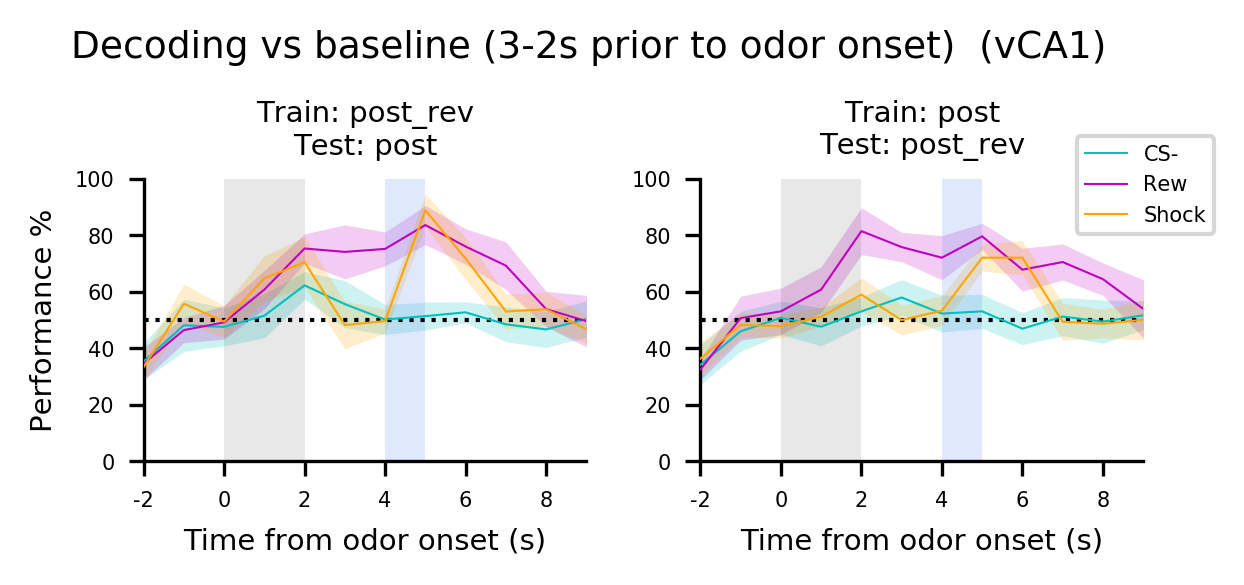

In [181]:
fig, ax = pl.subplots(1,2, figsize=(4, 1.8))

for comp,c,la in zip(['CSm','Rew','Sh'],['c','m','orange'],['CS-','Rew','Shock']):
    for x,i,sess in zip(range(2),range(8,10),all_comparisons[8:10]):
        ax[x].plot([(t-2) for t in range(14)], [(np.mean(eval("baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_%s"%(AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,t,comp)))*100) for t in range(14)],
                   color=c, ls='-',lw=.5, zorder=19 ,ms=1,label=la)
        m = np.array([(np.mean(eval("baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_%s"%(AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,t,comp)))*100) for t in range(14)])
        s = np.array([np.std(eval("baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_%s"%(AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,t,comp)))*100 for t in range(14)])
        ax[x].fill_between([(t-2) for t in range(14)],m-s,m+s,alpha=0.2,color=c,linewidth=0)
        ax[x].set_title("Train: "+ACP[i]+"\nTest: "+AC[i].split('__')[-1])
for x in range(2):
    ax[x].set_ylim(0, 100)
    ax[x].set_xlim(-2, 9)
    ax[x].set_xticks(np.arange(-2,10, 2))
    ax[x].set_xticklabels(np.arange(-2,10, 2))
    ax[x].hlines(50, -5,10, color='k', lw=1, linestyles='dotted')
    ax[x].set_xlabel('Time from odor onset (s)')
    ax[0].set_ylabel('Performance %')
    pt.plot_period_bar(ax[x], 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
    pt.plot_period_bar(ax[x], 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax[1].legend(bbox_to_anchor=(.85, 1.15), loc='upper left', borderaxespad=0.)

pl.suptitle("Decoding vs baseline (3-2s prior to odor onset)  (vCA1)", fontsize=9, y=1.05)

fig.tight_layout(pad=2)

#fig.savefig('../img/%s_3comp_horizontal.jpg'%NOTEBOOK_NAME)

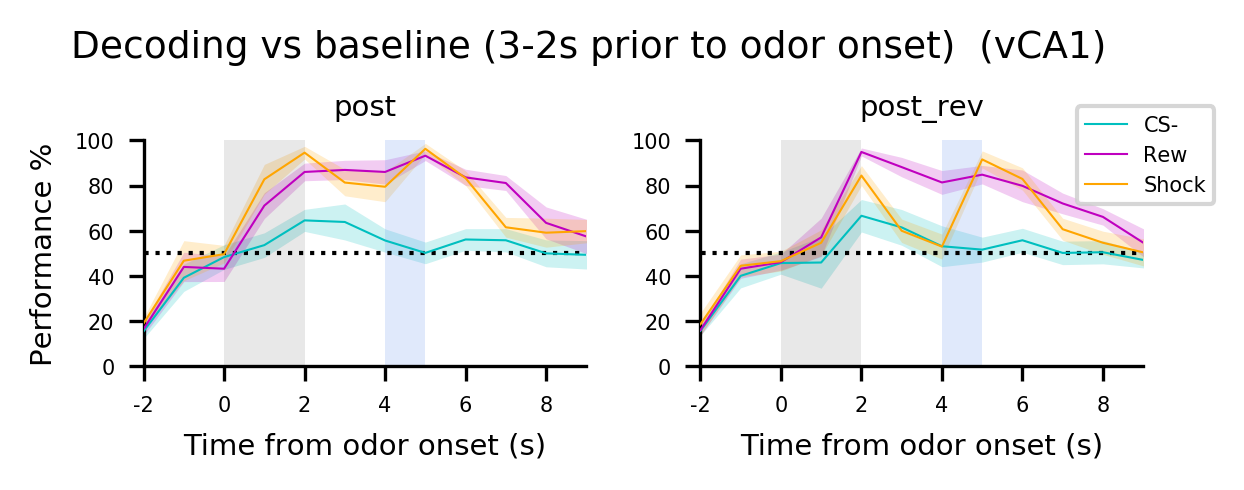

In [182]:
fig, ax = pl.subplots(1,2, figsize=(4, 1.5))

for comp,c,la in zip(['CSm','Rew','Sh'],['c','m','orange'],['CS-','Rew','Shock']):
    for x,i,sess in zip(range(2),range(8,10),all_comparisons[8:10]):
        ax[x].plot([(t-2) for t in range(14)], [(np.mean(eval("baseline_scores_%s_%s_tb_%s_vs_tb_%s_%s"%(AC[i].split('__')[0],AC[i].split('__')[-1],t,t,comp)))*100) for t in range(14)],
                   color=c, ls='-',lw=.5, zorder=19 ,ms=1,label=la)
        m = np.array([(np.mean(eval("baseline_scores_%s_%s_tb_%s_vs_tb_%s_%s"%(AC[i].split('__')[0],AC[i].split('__')[-1],t,t,comp)))*100) for t in range(14)])
        s = np.array([np.std(eval("baseline_scores_%s_%s_tb_%s_vs_tb_%s_%s"%(AC[i].split('__')[0],AC[i].split('__')[-1],t,t,comp)))*100 for t in range(14)])
        ax[x].fill_between([(t-2) for t in range(14)],m-s,m+s,alpha=0.2,color=c,linewidth=0)
        ax[x].set_title(sess.split('__')[-1])
for x in range(2):
    ax[x].set_ylim(0, 100)
    ax[x].set_xlim(-2, 9)
    ax[x].set_xticks(np.arange(-2,10, 2))
    ax[x].set_xticklabels(np.arange(-2,10, 2))
    ax[x].hlines(50, -5,10, color='k', lw=1, linestyles='dotted')
    ax[x].set_xlabel('Time from odor onset (s)')
    ax[0].set_ylabel('Performance %')
    pt.plot_period_bar(ax[x], 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
    pt.plot_period_bar(ax[x], 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax[1].legend(bbox_to_anchor=(.85, 1.15), loc='upper left', borderaxespad=0.)

pl.suptitle("Decoding vs baseline (3-2s prior to odor onset)  (vCA1)", fontsize=9, y=1.05)

fig.tight_layout(pad=2)

#fig.savefig('../img/%s_3comp_horizontal.jpg'%NOTEBOOK_NAME)

## now decoding keeping odor ID consistent across comparisons (not outcome, as above)

In [63]:
%%time
#across sessions
relabel = {0:-1,1:0,2:-1,3:-1,4:1,5:-1}
relabel_test = {0:-1,1:-1,2:0,3:-1,4:1,5:-1} #change the trial type assignement for task time bins, but not baseline (change from 1:0 to 2:0, but keep 4:1, in this case)
n_loops=10
#for comp, partner in zip(all_comparisons, all_comparisons_partners):
for i in range(0,len(AC[:-4]),2): # only looking at post and post_rev here. For all comparisons, use range(0,len(AC),2):
    for t in range(14): # number of time bins
        for c in range(14):
            exec('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_Rew_CS = {}'%(AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,c))
            print AC[i],t,c,
            exec('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_Rew_CS = np.r_[[do_test_across_tbs_and_sess(%s_tb_%s_w_baselines,labels_%s_w_baselines,\
                  %s_tb_%s_w_%s_baselines, labels_%s_w_%s_baselines, n_cells=n_cells,classes=range(0,6),relabel=relabel,relabel_test=relabel_test)\
                  for r in range(n_loops)]]'%(AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,c,AC[i+1],t,AC[i+1],AC[i],c,ACP[i],AC[i],ACP[i]))

preVSpost__patterns__pre 0 0 preVSpost__patterns__pre 0 1 preVSpost__patterns__pre 0 2 preVSpost__patterns__pre 0 3 preVSpost__patterns__pre 0 4 preVSpost__patterns__pre 0 5 preVSpost__patterns__pre 0 6 preVSpost__patterns__pre 0 7 preVSpost__patterns__pre 0 8 preVSpost__patterns__pre 0 9 preVSpost__patterns__pre 0 10 preVSpost__patterns__pre 0 11 preVSpost__patterns__pre 0 12 preVSpost__patterns__pre 0 13 preVSpost__patterns__pre 1 0 preVSpost__patterns__pre 1 1 preVSpost__patterns__pre 1 2 preVSpost__patterns__pre 1 3 preVSpost__patterns__pre 1 4 preVSpost__patterns__pre 1 5 preVSpost__patterns__pre 1 6 preVSpost__patterns__pre 1 7 preVSpost__patterns__pre 1 8 preVSpost__patterns__pre 1 9 preVSpost__patterns__pre 1 10 preVSpost__patterns__pre 1 11 preVSpost__patterns__pre 1 12 preVSpost__patterns__pre 1 13 preVSpost__patterns__pre 2 0 preVSpost__patterns__pre 2 1 preVSpost__patterns__pre 2 2 preVSpost__patterns__pre 2 3 preVSpost__patterns__pre 2 4 preVSpost__patterns__pre 2 5 preVSp

In [64]:
%%time
#across sessions
relabel = {0:-1,1:0,2:-1,3:-1,4:1,5:-1}
relabel_test = {0:-1,1:-1,2:0,3:-1,4:1,5:-1}
n_loops=10
#for comp, partner in zip(all_comparisons, all_comparisons_partners):
for i in range(1,len(AC[:-4]),2): #### THIS IS WHAT'S DIFFERENT FROM THE ABOVE
    for t in range(14): # number of time bins
        for c in range(14):
            exec('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_Rew_CS = {}'%(AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,c))
            print AC[i],t,c,
            exec('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_Rew_CS = np.r_[[do_test_across_tbs_and_sess(%s_tb_%s_w_baselines,labels_%s_w_baselines,\
                  %s_tb_%s_w_%s_baselines, labels_%s_w_%s_baselines, n_cells=n_cells,classes=range(0,6),relabel=relabel,relabel_test=relabel_test)\
                  for r in range(n_loops)]]'%(AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,c,AC[i-1],t,AC[i-1],AC[i],c,ACP[i],AC[i],ACP[i]))

preVSpost__patterns__post 0 0 preVSpost__patterns__post 0 1 preVSpost__patterns__post 0 2 preVSpost__patterns__post 0 3 preVSpost__patterns__post 0 4 preVSpost__patterns__post 0 5 preVSpost__patterns__post 0 6 preVSpost__patterns__post 0 7 preVSpost__patterns__post 0 8 preVSpost__patterns__post 0 9 preVSpost__patterns__post 0 10 preVSpost__patterns__post 0 11 preVSpost__patterns__post 0 12 preVSpost__patterns__post 0 13 preVSpost__patterns__post 1 0 preVSpost__patterns__post 1 1 preVSpost__patterns__post 1 2 preVSpost__patterns__post 1 3 preVSpost__patterns__post 1 4 preVSpost__patterns__post 1 5 preVSpost__patterns__post 1 6 preVSpost__patterns__post 1 7 preVSpost__patterns__post 1 8 preVSpost__patterns__post 1 9 preVSpost__patterns__post 1 10 preVSpost__patterns__post 1 11 preVSpost__patterns__post 1 12 preVSpost__patterns__post 1 13 preVSpost__patterns__post 2 0 preVSpost__patterns__post 2 1 preVSpost__patterns__post 2 2 preVSpost__patterns__post 2 3 preVSpost__patterns__post 2 4 pr

In [66]:
%%time
#across sessions
relabel = {0:-1,1:-1,2:0,3:-1,4:-1,5:1}
relabel_test = {0:-1,1:0,2:-1,3:-1,4:-1,5:1}
n_loops=10
#for comp, partner in zip(all_comparisons, all_comparisons_partners):
for i in range(0,len(AC[:-4]),2): # only looking at post and post_rev here. For all comparisons, use range(0,len(AC),2):
    for t in range(14): # number of time bins
        for c in range(14):
            exec('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_Sh_CS = {}'%(AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,c))
            print AC[i],t,c,
            exec('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_Sh_CS = np.r_[[do_test_across_tbs_and_sess(%s_tb_%s_w_baselines,labels_%s_w_baselines,\
                  %s_tb_%s_w_%s_baselines, labels_%s_w_%s_baselines, n_cells=n_cells,classes=range(0,6),relabel=relabel,relabel_test=relabel_test)\
                  for r in range(n_loops)]]'%(AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,c,AC[i+1],t,AC[i+1],AC[i],c,ACP[i],AC[i],ACP[i]))

 preVSpost__patterns__pre 0 0 preVSpost__patterns__pre 0 1 preVSpost__patterns__pre 0 2 preVSpost__patterns__pre 0 3 preVSpost__patterns__pre 0 4 preVSpost__patterns__pre 0 5 preVSpost__patterns__pre 0 6 preVSpost__patterns__pre 0 7 preVSpost__patterns__pre 0 8 preVSpost__patterns__pre 0 9 preVSpost__patterns__pre 0 10 preVSpost__patterns__pre 0 11 preVSpost__patterns__pre 0 12 preVSpost__patterns__pre 0 13 preVSpost__patterns__pre 1 0 preVSpost__patterns__pre 1 1 preVSpost__patterns__pre 1 2 preVSpost__patterns__pre 1 3 preVSpost__patterns__pre 1 4 preVSpost__patterns__pre 1 5 preVSpost__patterns__pre 1 6 preVSpost__patterns__pre 1 7 preVSpost__patterns__pre 1 8 preVSpost__patterns__pre 1 9 preVSpost__patterns__pre 1 10 preVSpost__patterns__pre 1 11 preVSpost__patterns__pre 1 12 preVSpost__patterns__pre 1 13 preVSpost__patterns__pre 2 0 preVSpost__patterns__pre 2 1 preVSpost__patterns__pre 2 2 preVSpost__patterns__pre 2 3 preVSpost__patterns__pre 2 4 preVSpost__patterns__pre 2 5 preVS

In [67]:
%%time
#across sessions
relabel = {0:-1,1:-1,2:0,3:-1,4:-1,5:1}
relabel_test = {0:-1,1:0,2:-1,3:-1,4:-1,5:1}
n_loops=10
#for comp, partner in zip(all_comparisons, all_comparisons_partners):
for i in range(1,len(AC[:-4]),2): #### THIS IS WHAT'S DIFFERENT FROM THE ABOVE
    for t in range(14): # number of time bins
        for c in range(14):
            exec('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_Sh_CS = {}'%(AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,c))
            print AC[i],t,c,
            exec('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_Sh_CS = np.r_[[do_test_across_tbs_and_sess(%s_tb_%s_w_baselines,labels_%s_w_baselines,\
                  %s_tb_%s_w_%s_baselines, labels_%s_w_%s_baselines, n_cells=n_cells,classes=range(0,6),relabel=relabel,relabel_test=relabel_test)\
                  for r in range(n_loops)]]'%(AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,c,AC[i-1],t,AC[i-1],AC[i],c,ACP[i],AC[i],ACP[i]))

preVSpost__patterns__post 0 0 preVSpost__patterns__post 0 1 preVSpost__patterns__post 0 2 preVSpost__patterns__post 0 3 preVSpost__patterns__post 0 4 preVSpost__patterns__post 0 5 preVSpost__patterns__post 0 6 preVSpost__patterns__post 0 7 preVSpost__patterns__post 0 8 preVSpost__patterns__post 0 9 preVSpost__patterns__post 0 10 preVSpost__patterns__post 0 11 preVSpost__patterns__post 0 12 preVSpost__patterns__post 0 13 preVSpost__patterns__post 1 0 preVSpost__patterns__post 1 1 preVSpost__patterns__post 1 2 preVSpost__patterns__post 1 3 preVSpost__patterns__post 1 4 preVSpost__patterns__post 1 5 preVSpost__patterns__post 1 6 preVSpost__patterns__post 1 7 preVSpost__patterns__post 1 8 preVSpost__patterns__post 1 9 preVSpost__patterns__post 1 10 preVSpost__patterns__post 1 11 preVSpost__patterns__post 1 12 preVSpost__patterns__post 1 13 preVSpost__patterns__post 2 0 preVSpost__patterns__post 2 1 preVSpost__patterns__post 2 2 preVSpost__patterns__post 2 3 preVSpost__patterns__post 2 4 pr

In [204]:
#make dictionary of comparisons
for t in range(14):
    for tt in 'CSm','Rew','Sh':
        exec('distinct%s_%s_CS = {}'%(t,tt))
        
for i in range(12):
    for t in range(14):
        exec("distinct%s_%s_CS['%s_%s_w_%s_base'] = []"%(t,tt,AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i]))
        for c in range(14):
            eval("distinct%s_%s_CS['%s_%s_w_%s_base']"%(t,tt,AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i])).insert(c,
                    (eval('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_%s'%(AC[i].split('__')[0],AC[i].split('__')[-1],
                    ACP[i],t,c,tt))))

for comp in all_comparisons[:-4]:
    for t in range(14):
        exec("distinct%s_%s_CS['%s_%s_w_%s_base'] = []"%(t,tt,comp.split('__')[0],comp.split('__')[-1],comp.split('__')[-1]))
        for c in range(14):
            eval("distinct%s_%s_CS['%s_%s_w_%s_base']"%(t,tt,comp.split('__')[0],comp.split('__')[-1],comp.split('__')[-1])).insert(c,
                    (eval('baseline_scores_%s_%s_tb_%s_vs_tb_%s_%s'%(comp.split('__')[0],comp.split('__')[-1],t,c,tt))))

In [205]:
#perform wilcoxon test (nonparametric) for each decoding epoch vs chance (.5)
for tt in 'CSm','Rew','Sh':
    for t in range(14):
        exec("distinct%s_%s_CS_wilcox = {}"%(t,tt))
        for i in eval("distinct%s_%s_CS"%(t,tt)):
            exec("distinct%s_%s_CS_wilcox[i] = [[] for x in range(len(distinct%s_%s_CS[i]))]"%(t,tt,t,tt)) #initialize list of lists with proper # of entries
            for r in range(len(eval("distinct%s_%s_CS[i]"%(t,tt)))):
                exec("subtracted = [x-0.5 for x in distinct%s_%s_CS[i][r]]"%(t,tt))
                exec("distinct%s_%s_CS_wilcox[i][r] =  sstats.wilcoxon(subtracted[:15])"%(t,tt))
                exec("distinct%s_%s_CS_wilcox[i][r] = distinct%s_%s_CS_wilcox[i][r][-1]"%(t,tt,t,tt)) #only take p-values

In [206]:
#make dictionary of comparisons, taking mean of all loops
for t in range(14):
    for tt in 'CSm','Rew','Sh':
        exec('distinct%s_means_%s_CS = {}'%(t,tt))
    
for i in range(len(AC[:-4])):
    for t in range(14):
        exec("distinct%s_means_%s_CS['%s_%s_w_%s_base'] = []"%(t,tt,AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i]))
        for c in range(14):
            eval("distinct%s_means_%s_CS['%s_%s_w_%s_base']"%(t,tt,AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i])).insert(c,
                    (eval('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_%s'%(AC[i].split('__')[0],AC[i].split('__')[-1],
                    ACP[i],t,c,tt))).mean())
            
for comp in all_comparisons[:-4]:
    for t in range(14):
        exec("distinct%s_means_%s_CS['%s_%s_w_%s_base'] = []"%(t,tt,comp.split('__')[0],comp.split('__')[-1],comp.split('__')[-1]))
        for c in range(14):
            eval("distinct%s_means_%s_CS['%s_%s_w_%s_base']"%(t,tt,comp.split('__')[0],comp.split('__')[-1],comp.split('__')[-1])).insert(c,
                    (eval('baseline_scores_%s_%s_tb_%s_vs_tb_%s_%s'%(comp.split('__')[0],comp.split('__')[-1],t,c,tt))).mean())

In [207]:
distinct_means_CSm_CS={}
for i in distinct0_means_CSm_CS:
    distinct_means_CSm_CS[i]=[]
    for r in range(len(distinct0_means_CSm_CS[i])):
        distinct_means_CSm_CS[i].append(eval("distinct%s_means_CSm_CS"%r)[i])
    np.array([distinct_means_CSm_CS[i]])

In [208]:
distinct_means_Rew_CS={}
for i in distinct0_means_Rew_CS:
    distinct_means_Rew_CS[i]=[]
    for r in range(len(distinct0_means_Rew_CS[i])):
        distinct_means_Rew_CS[i].append(eval("distinct%s_means_Rew_CS"%r)[i])
    np.array([distinct_means_Rew_CS[i]])

In [209]:
distinct_means_Sh_CS={}
for i in distinct0_means_Sh_CS:
    distinct_means_Sh_CS[i]=[]
    for r in range(len(distinct0_means_Sh_CS[i])):
        distinct_means_Sh_CS[i].append(eval("distinct%s_means_Sh_CS"%r)[i])
    np.array([distinct_means_Sh_CS[i]])

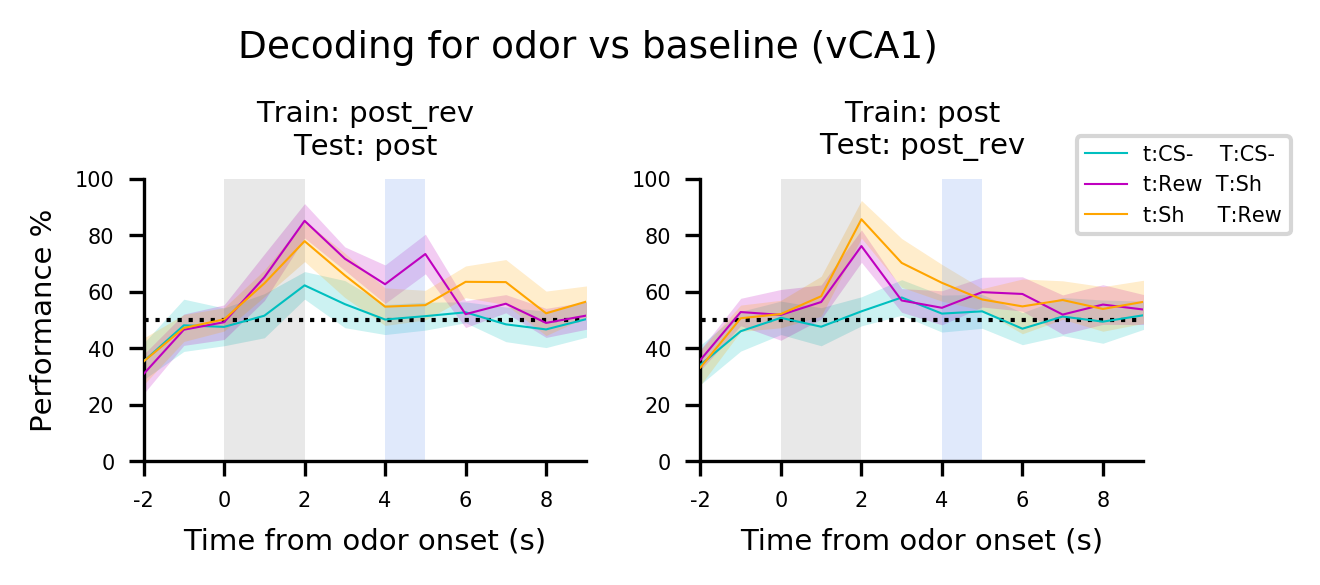

In [74]:
fig, ax = pl.subplots(1,2, figsize=(4, 1.8))
for comp,c,la in zip(['CSm','Rew_CS','Sh_CS'],['c','m','orange'],['t:CS-    T:CS-','t:Rew  T:Sh','t:Sh     T:Rew']):
    for x,i,sess in zip(range(2),range(8,10),all_comparisons[8:10]):
        ax[x].plot([(t-2) for t in range(14)], [(np.mean(eval("baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_%s"%(AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,t,comp)))*100) for t in range(14)],
                   color=c, ls='-',lw=.5, zorder=19 ,ms=1,label=la)
        m = np.array([(np.mean(eval("baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_%s"%(AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,t,comp)))*100) for t in range(14)])
        s = np.array([np.std(eval("baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_%s"%(AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,t,comp)))*100 for t in range(14)])
        ax[x].fill_between([(t-2) for t in range(14)],m-s,m+s,alpha=0.2,color=c,linewidth=0)
        ax[x].set_title("Train: "+ACP[i]+"\nTest: "+AC[i].split('__')[-1])
for x in range(2):
    ax[x].set_ylim(0, 100)
    ax[x].set_xlim(-2, 9)
    ax[x].set_xticks(np.arange(-2,10, 2))
    ax[x].set_xticklabels(np.arange(-2,10, 2))
    ax[x].hlines(50, -5,10, color='k', lw=1, linestyles='dotted')
    ax[x].set_xlabel('Time from odor onset (s)')
    ax[0].set_ylabel('Performance %')
    pt.plot_period_bar(ax[x], 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
    pt.plot_period_bar(ax[x], 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax[1].legend(bbox_to_anchor=(.85, 1.15), loc='upper left', borderaxespad=0.)

pl.suptitle("Decoding for odor vs baseline (vCA1)", fontsize=9, y=1.05)

fig.tight_layout(pad=2)

#fig.savefig('../img/%s_3comp_horizontal.jpg'%NOTEBOOK_NAME)

In [210]:
#get average of post-post_rev and post_rev-post
for tt in 'CSm','Rew','Sh':
    for t in range(14):
        exec("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_%s = \
        np.mean([baseline_scores_postVSpost_rev_post_w_post_rev_baselines_tb_%s_vs_tb_%s_%s,\
        baseline_scores_postVSpost_rev_post_rev_w_post_baselines_tb_%s_vs_tb_%s_%s],axis=0)"%(t,t,tt,t,t,tt,t,t,tt))

In [211]:
for tt in 'CSm','Rew_CS','Sh_CS':
    for t in range(14):
        exec("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_%s = \
        np.mean([baseline_scores_postVSpost_rev_post_w_post_rev_baselines_tb_%s_vs_tb_%s_%s,\
        baseline_scores_postVSpost_rev_post_rev_w_post_baselines_tb_%s_vs_tb_%s_%s],axis=0)"%(t,t,tt,t,t,tt,t,t,tt))

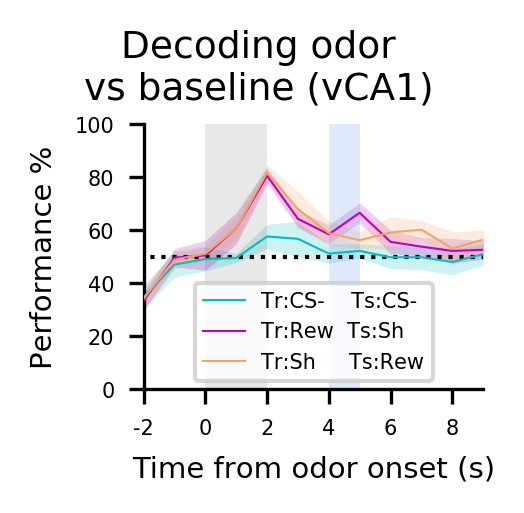

In [187]:
fig, ax = pl.subplots(1,1, figsize=(1.8, 1.5))
for comp,c,la in zip(['CSm','Rew_CS','Sh_CS'],['c','m','sandybrown'],['Tr:CS-    Ts:CS-','Tr:Rew  Ts:Sh','Tr:Sh     Ts:Rew']):
    #for x,i,sess in zip(range(2),range(8,10),all_comparisons[8:10]):
        ax.plot([(t-2) for t in range(14)], [(np.mean(eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_%s"%(t,t,comp)))*100) for t in range(14)],
                   color=c, ls='-',lw=.5, zorder=19 ,ms=1,label=la)
        m = np.array([(np.mean(eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_%s"%(t,t,comp)))*100) for t in range(14)])
        s = np.array([np.std(eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_%s"%(t,t,comp)))*100 for t in range(14)])
        ax.fill_between([(t-2) for t in range(14)],m-s,m+s,alpha=0.2,color=c,linewidth=0)
        #ax.set_title("Train: "+ACP[i]+"\nTest: "+AC[i].split('__')[-1])

ax.set_ylim(0, 100)
ax.set_xlim(-2, 9)
ax.set_xticks(np.arange(-2,10, 2))
ax.set_xticklabels(np.arange(-2,10, 2))
ax.hlines(50, -5,10, color='k', lw=1, linestyles='dotted')
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
pt.plot_period_bar(ax, 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax.legend(bbox_to_anchor=(.15, 0.4), loc='upper left', borderaxespad=0.)

pl.suptitle("Decoding odor\nvs baseline (vCA1)", fontsize=9, y=1.1)

fig.tight_layout(pad=2)

fig.savefig('../figures/%s_avg_odor.pdf'%NOTEBOOK_NAME)

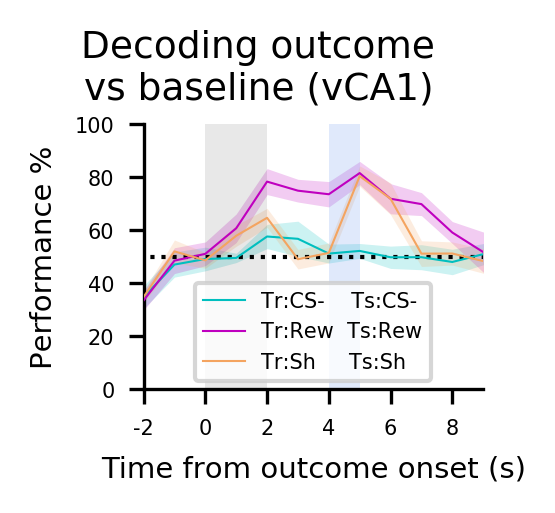

In [189]:
fig, ax = pl.subplots(1,1, figsize=(1.8, 1.5))
for comp,c,la in zip(['CSm','Rew','Sh'],['c','m','sandybrown'],['Tr:CS-    Ts:CS-','Tr:Rew  Ts:Rew','Tr:Sh     Ts:Sh']):
    #for x,i,sess in zip(range(2),range(8,10),all_comparisons[8:10]):
        ax.plot([(t-2) for t in range(14)], [(np.mean(eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_%s"%(t,t,comp)))*100) for t in range(14)],
                   color=c, ls='-',lw=.5, zorder=19 ,ms=1,label=la)
        m = np.array([(np.mean(eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_%s"%(t,t,comp)))*100) for t in range(14)])
        s = np.array([np.std(eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_%s"%(t,t,comp)))*100 for t in range(14)])
        ax.fill_between([(t-2) for t in range(14)],m-s,m+s,alpha=0.2,color=c,linewidth=0)
        #ax.set_title("Train: "+ACP[i]+"\nTest: "+AC[i].split('__')[-1])

ax.set_ylim(0, 100)
ax.set_xlim(-2, 9)
ax.set_xticks(np.arange(-2,10, 2))
ax.set_xticklabels(np.arange(-2,10, 2))
ax.hlines(50, -5,10, color='k', lw=1, linestyles='dotted')
ax.set_xlabel('Time from outcome onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
pt.plot_period_bar(ax, 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax.legend(bbox_to_anchor=(.15, .4), loc='upper left', borderaxespad=0.)

pl.suptitle("Decoding outcome\nvs baseline (vCA1)", fontsize=9, y=1.1)

fig.tight_layout(pad=2)

fig.savefig('../figures/%s_avg_outcome.pdf'%NOTEBOOK_NAME)

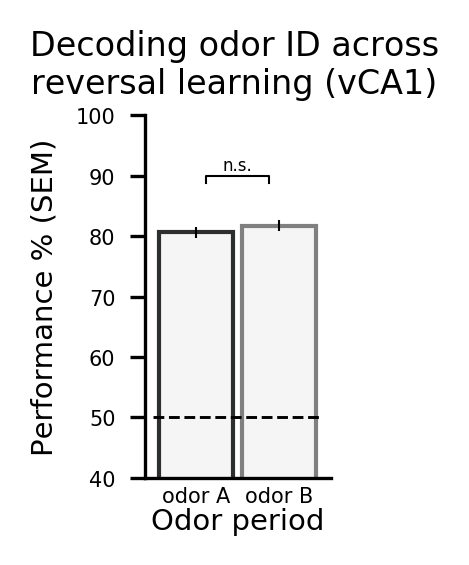

In [190]:
labels = ['Odor period']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
loops=10
#v={}
fig, ax = pl.subplots(figsize=(.8,1.6))
ax.bar(-.02 -width/2, np.mean(mean_odor_postVSpost_rev_tb_4_vs_tb_4_Rew_CS[:loops])*100, width,color='whitesmoke',edgecolor='#2D2E2E',label='CS1'
       ,yerr=np.array((np.std(mean_odor_postVSpost_rev_tb_4_vs_tb_4_Rew_CS[:loops])/(np.sqrt(loops-1)))*100))
ax.bar(+.02+width/2, np.mean(mean_odor_postVSpost_rev_tb_4_vs_tb_4_Sh_CS[:loops])*100, width,color='whitesmoke',edgecolor='grey',label='CS2',
       yerr=np.array((np.std(mean_odor_postVSpost_rev_tb_4_vs_tb_4_Sh_CS[:loops])/(np.sqrt(loops-1)))*100))
#    ax.bar(i + .3, np.mean(eval("mean_odor_postVSpost_rev_tb_8_vs_tb_8_%s"%(t))[:loops])*100, width, color='#02337D',label='CS-',yerr=np.array(np.std(eval("mean_odor_postVSpost_rev_tb_8_vs_tb_8_%s"%(t))[:loops])*100))
#ax.legend(['odor','trace'],loc=[.8,.6])
ax.hlines(50,-.4,.4, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Performance % (SEM)')
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=7)
ax.tick_params(axis='x',bottom=False)
ax.set_ylim(40,100)
ax.text(-.02-width/2,36,'odor A',ha='center')
ax.text(.02+width/2,36,'odor B',ha='center')

pvs=[]
pvs.append(add_significance(ax, mean_odor_postVSpost_rev_tb_4_vs_tb_4_Rew_CS[:loops],
            mean_odor_postVSpost_rev_tb_4_vs_tb_4_Sh_CS[:loops],-.15,.15,90,mcc=1))
#    pvs.append(add_significance(ax, eval("mean_odor_postVSpost_rev_tb_6_vs_tb_6_%s"%(t))[:loops],
#               eval("mean_odor_postVSpost_rev_tb_8_vs_tb_8_%s"%(t))[:loops],i+.01,0.3+i,90,mcc=2))
#    pvs.append(add_significance(ax, eval("mean_odor_postVSpost_rev_tb_4_vs_tb_4_%s"%(t))[:loops],
#               eval("mean_odor_postVSpost_rev_tb_8_vs_tb_8_%s"%(t))[:loops],-0.3+i,0.3+i,97,mcc=2))
#        pvs.append(sig_vs_chance(ax,eval("baseline_scores_tb_%s_%s_vhpc"%(t,comp))['post'][:loops],.5,-.2+i,
#                   np.mean(eval("baseline_scores_tb_%s_%s_vhpc"%(t,comp))['post'][:loops])*100+v['post']+1,loops=loops,sig_func=None,colors='k'))
#        pvs.append(sig_vs_chance(ax,eval("baseline_scores_tb_%s_%s_dhpc"%(t,comp))['post'][:loops],.5, .2+i,
#                   np.mean(eval("baseline_scores_tb_%s_%s_dhpc"%(t,comp))['post'][:loops])*100+d['post']+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding odor ID across\nreversal learning (vCA1)',y=1.06,fontsize=8)

fig.savefig('../figures/%s_Xsess_bars_CS.pdf'%NOTEBOOK_NAME)

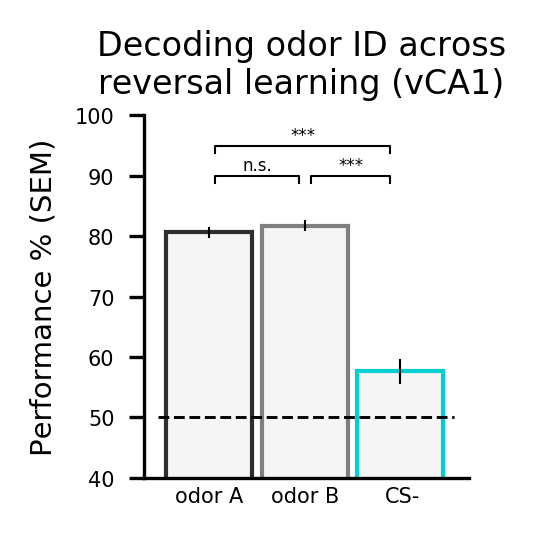

In [212]:
labels = ['Odor period']
#x = np.arange(2)  # the label locations
width = 0.35  # the width of the bars
loops=10
#v={}
fig, ax = pl.subplots(figsize=(1.4,1.6))
ax.bar(-.02 -width/2, np.mean(mean_odor_postVSpost_rev_tb_4_vs_tb_4_Rew_CS[:loops])*100, width,color='whitesmoke',edgecolor='#2D2E2E',label='CS1'
       ,yerr=np.array((np.std(mean_odor_postVSpost_rev_tb_4_vs_tb_4_Rew_CS[:loops])/(np.sqrt(loops-1)))*100))
ax.bar(+.02+width/2, np.mean(mean_odor_postVSpost_rev_tb_4_vs_tb_4_Sh_CS[:loops])*100, width,color='whitesmoke',edgecolor='grey',label='CS2',
       yerr=np.array((np.std(mean_odor_postVSpost_rev_tb_4_vs_tb_4_Sh_CS[:loops])/(np.sqrt(loops-1)))*100))
ax.bar(+.23+width, np.mean(mean_odor_postVSpost_rev_tb_4_vs_tb_4_CSm[:loops])*100, width,color='whitesmoke',edgecolor='darkturquoise',label='CS-',
       yerr=np.array((np.std(mean_odor_postVSpost_rev_tb_4_vs_tb_4_CSm[:loops])/(np.sqrt(loops-1)))*100))
#    ax.bar(i + .3, np.mean(eval("mean_odor_postVSpost_rev_tb_8_vs_tb_8_%s"%(t))[:loops])*100, width, color='#02337D',label='CS-',yerr=np.array(np.std(eval("mean_odor_postVSpost_rev_tb_8_vs_tb_8_%s"%(t))[:loops])*100))
#ax.legend(['odor','trace'],loc=[.8,.6])
ax.hlines(50,-.4,.8, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Performance % (SEM)')
#ax.set_xticks(x)
#ax.set_xticklabels(labels,fontsize=7)
ax.tick_params(axis='x',bottom=False,labelbottom=False)
ax.set_ylim(40,100)
ax.text(-.02-width/2,36,'odor A',ha='center')
ax.text(.02+width/2,36,'odor B',ha='center')
ax.text(.24+width,36,'CS-',ha='center')


pvs=[]
pvs.append(add_significance(ax, mean_odor_postVSpost_rev_tb_4_vs_tb_4_Rew_CS[:loops],
            mean_odor_postVSpost_rev_tb_4_vs_tb_4_Sh_CS[:loops],-.17,.17,90,mcc=2))
pvs.append(add_significance(ax, mean_odor_postVSpost_rev_tb_4_vs_tb_4_CSm[:loops],
            mean_odor_postVSpost_rev_tb_4_vs_tb_4_Sh_CS[:loops],.22,.54,90,mcc=2))
pvs.append(add_significance(ax, mean_odor_postVSpost_rev_tb_4_vs_tb_4_CSm[:loops],
            mean_odor_postVSpost_rev_tb_4_vs_tb_4_Rew_CS[:loops],-.17,.54,95,mcc=2))
#    pvs.append(add_significance(ax, eval("mean_odor_postVSpost_rev_tb_6_vs_tb_6_%s"%(t))[:loops],
#               eval("mean_odor_postVSpost_rev_tb_8_vs_tb_8_%s"%(t))[:loops],i+.01,0.3+i,90,mcc=2))
#    pvs.append(add_significance(ax, eval("mean_odor_postVSpost_rev_tb_4_vs_tb_4_%s"%(t))[:loops],
#               eval("mean_odor_postVSpost_rev_tb_8_vs_tb_8_%s"%(t))[:loops],-0.3+i,0.3+i,97,mcc=2))
#        pvs.append(sig_vs_chance(ax,eval("baseline_scores_tb_%s_%s_vhpc"%(t,comp))['post'][:loops],.5,-.2+i,
#                   np.mean(eval("baseline_scores_tb_%s_%s_vhpc"%(t,comp))['post'][:loops])*100+v['post']+1,loops=loops,sig_func=None,colors='k'))
#        pvs.append(sig_vs_chance(ax,eval("baseline_scores_tb_%s_%s_dhpc"%(t,comp))['post'][:loops],.5, .2+i,
#                   np.mean(eval("baseline_scores_tb_%s_%s_dhpc"%(t,comp))['post'][:loops])*100+d['post']+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding odor ID across\nreversal learning (vCA1)',y=1.06,fontsize=8)

#fig.savefig('../figures/%s_Xsess_bars_CS.pdf'%NOTEBOOK_NAME)

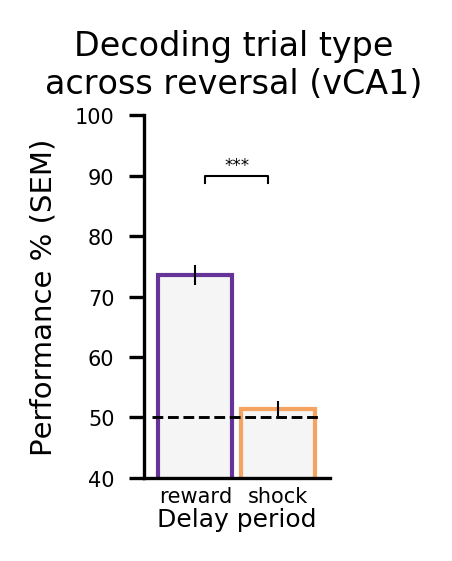

In [192]:
labels = ['Delay period']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
loops=10
#v={}
fig, ax = pl.subplots(figsize=(.8,1.6))
ax.bar(-.02 - width/2, np.mean(mean_outcome_postVSpost_rev_tb_6_vs_tb_6_Rew[:loops])*100, width,color='whitesmoke',edgecolor='rebeccapurple',
       yerr=np.array((np.std(mean_outcome_postVSpost_rev_tb_6_vs_tb_6_Rew[:loops])/np.sqrt(loops-1))*100))
ax.bar(.02+width/2, np.mean(mean_outcome_postVSpost_rev_tb_6_vs_tb_6_Sh[:loops])*100, width,color='whitesmoke',edgecolor='sandybrown',
       yerr=np.array((np.std(mean_outcome_postVSpost_rev_tb_6_vs_tb_6_Sh[:loops])/np.sqrt(loops-1))*100))
#ax.legend(loc=[.86,.6])
ax.hlines(50,-.4,.4, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Performance % (SEM)')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=6)
ax.tick_params(axis='x',bottom=False)
ax.set_ylim(40,100)
ax.text(-.02-width/2,36,'reward',ha='center')
ax.text(.02+width/2,36,'shock',ha='center')

pvs=[]
pvs.append(add_significance(ax, mean_outcome_postVSpost_rev_tb_6_vs_tb_6_Rew[:loops],
            mean_outcome_postVSpost_rev_tb_6_vs_tb_6_Sh[:loops],-.15,.15,90,mcc=1))
pl.suptitle('Decoding trial type\nacross reversal (vCA1)',y=1.06,fontsize=8)

fig.savefig('../figures/%s_Xsess_bars_tr.pdf'%NOTEBOOK_NAME)

In [214]:
save_workspace(db)

Could not store variable 'IPython'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pl'. Skipping...
